# Seaborn

what is it?
- a visual library that builds on top of matplotlib 
- features nice integration with pandas
- api reference: https://seaborn.pydata.org/api.html#

why do we care? 
- it's pretty
- it integrates nicely with pandas
- adds functionality
- less code than matplotlib

Today:
- importing data from seaborn
- different types of plots
    - relplot
    - distplot
    - catplot
    - pairplot
    - heatmap
    

In [1]:
# pandas for tabular data manipulation
import pandas as pd

# numpy for vectorized matrix operations
import numpy as np

# matplotlib.pyplot for basic matplotlib functionality
import matplotlib.pyplot as plt

# seabon for more visualizations! 
import seaborn as sns

## Data From Seaborn

we'll be using the tips dataset for this demo

#### from pydataset

In [2]:
from pydataset import data

In [4]:
data('tips').head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


#### from seaborn

In [5]:
#look for all datasets available in seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [35]:
#load the tips dataset
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [36]:
#check out the dataset
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [37]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Types of data:

Continuous Data: Numeric data with possibly infinite resolution (typically measuring something)

- total_bill
- tip

Categorical: Distinct categories or buckets (typically limited number of values)

- sex
- day
- time 
- smoker

Discrete: Distinct numeric categories (typically counting something)

- size



## Let's look at the plots!

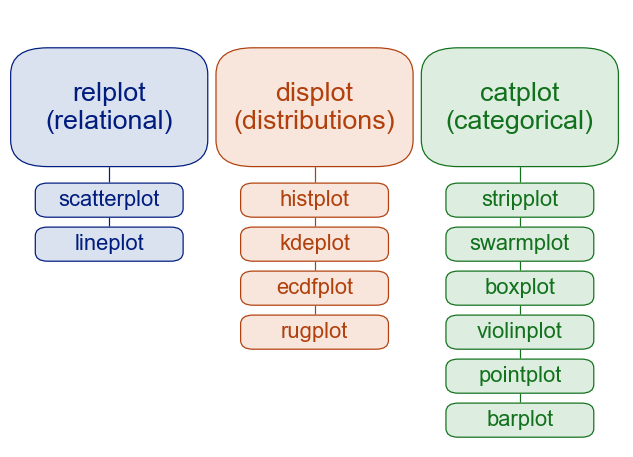

source: https://seaborn.pydata.org/tutorial/function_overview.html

- Top level plots are figure-level with more customization and flexibility 
- Lower level are axes-level that you can utilize to use a lot of matplotlib's functions

## Relplot

- comparing two numeric variables
   - scatter for continuous
   - line for discrete

In [38]:
df = tips
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### matplotlib

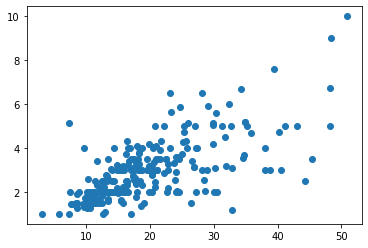

In [39]:
#matplotlib's scatter to compare total_bill and tip
plt.scatter(df.total_bill, df.tip)
plt.show()

#### matplotlib - multiple categories

In [40]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [42]:
#make two separate dfs to plot different categories
df_no_smoking = df [ df.smoker == 'No']
df_no_smoking.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [43]:
df_yes_smoking = df [ df.smoker == 'Yes']
df_yes_smoking.head()

,total_bill,tip,sex,smoker,day,time,size
56,38.01,3.00,Male,Yes,Sat,Dinner,4
58,11.24,1.76,Male,Yes,Sat,Dinner,2
60,20.29,3.21,Male,Yes,Sat,Dinner,2
61,13.81,2.00,Male,Yes,Sat,Dinner,2
62,11.02,1.98,Male,Yes,Sat,Dinner,2


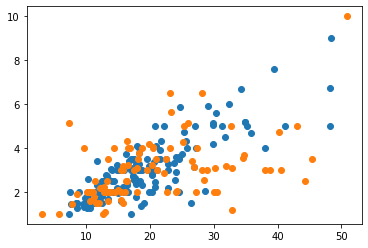

In [45]:
plt.scatter(df_no_smoking.total_bill, df_no_smoking.tip)
plt.scatter(df_yes_smoking.total_bill, df_yes_smoking.tip)
plt.show()

#### seaborn relplot

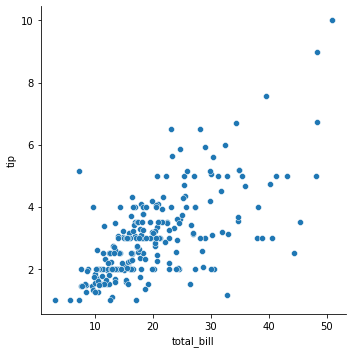

In [48]:
#plot total_bill vs tip

#must explictliy send in the dataframe first
#send in each axis as a string value
sns.relplot(data=df, x='total_bill', y='tip')

plt.show()

#### seaborn relplot arguments

- `hue` argument: changes color for categorical variable
- `col` argument: makes separate columns for categorical variable

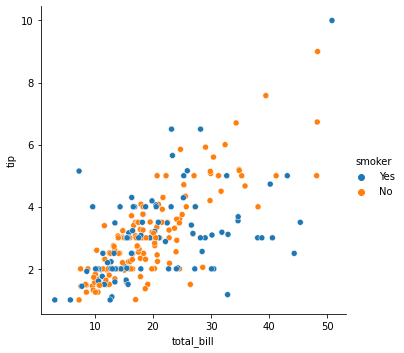

In [49]:
#using hue
sns.relplot(data=df, x='total_bill', y='tip', hue='smoker')
plt.show()

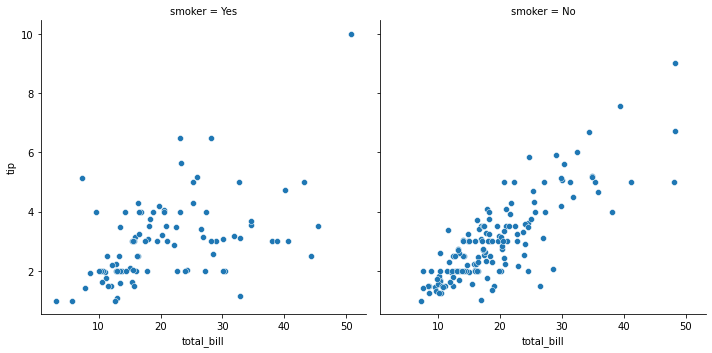

In [50]:
#using col
sns.relplot(data=df, x='total_bill', y='tip', col='smoker')
plt.show()

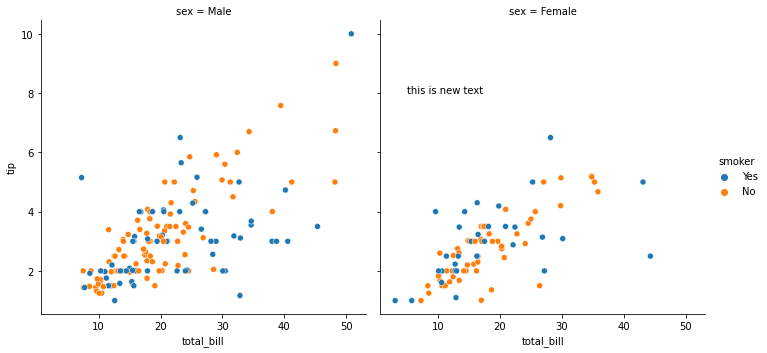

In [55]:
#using both
sns.relplot(data=df, x='total_bill', y='tip', hue='smoker', col='sex')
plt.text(5,8,'this is new text') #only outputs on the last graph
plt.show()

#### seaborn relplot - discrete variables

In [56]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


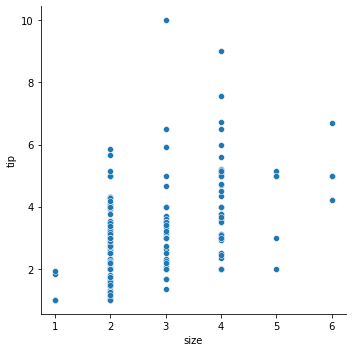

In [57]:
sns.relplot(data=df, x='size', y='tip')
plt.show()

#### seaborn relplot - line plot

- `kind='line'` agrument

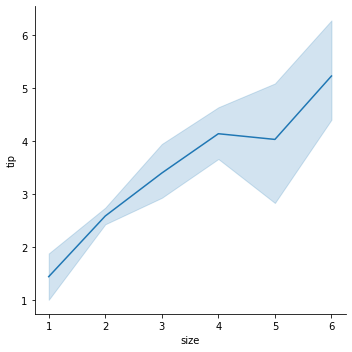

In [59]:
sns.relplot(data=df, x='size', y='tip', kind='line')
plt.show()

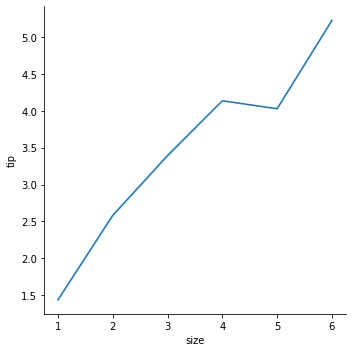

In [121]:
#remove CI
# errorbar=('ci', False)
# sns.relplot(data=df, x='size', y='tip', kind='line', ci=False)
sns.relplot(data=df, x='size', y='tip', kind='line', errorbar=('ci', False))
plt.show()

#### seaborn relplot - line plot - with continuous variables

- Note: probably not an appropriate graph for this data

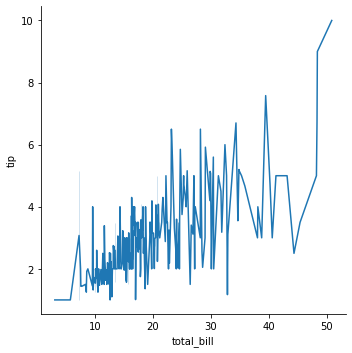

In [61]:
#with tip and total_bill
sns.relplot(data=df, x='total_bill', y='tip', kind='line')
plt.show()

#### Axes-level plots

- `sns.scatterplot`
- `sns.lineplot`

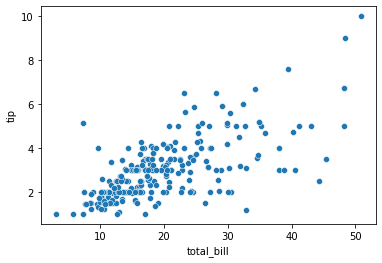

In [63]:
#total bill vs tip
sns.scatterplot(data=df, x='total_bill', y='tip')
plt.show()

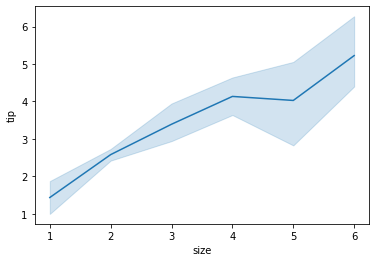

In [64]:
#size vs tip
sns.lineplot(data=df, x='size', y='tip')
plt.show()

## Displot

- shows the distribution of a variable
    - typically continunous

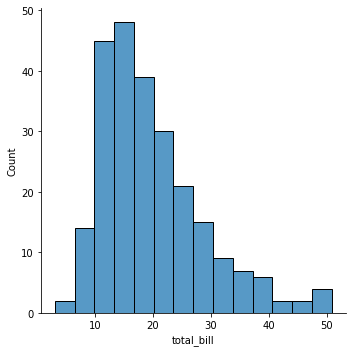

In [67]:
#distribution of total_bill
sns.displot(data=df, x='total_bill')
plt.show()

#### displot arguments

- `kde`: probability of finding a observartions at particular value of x
    - also, smoothed out version of histogram
    
- `rug`: show each observation with marginal ticks
- `multiple`: allows you to stack on top, instead of overlaying
-  also `hue` and `col`! 

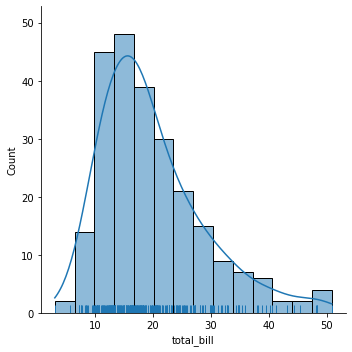

In [70]:
sns.displot(data=df, x='total_bill', kde=True, rug=True)
plt.show()

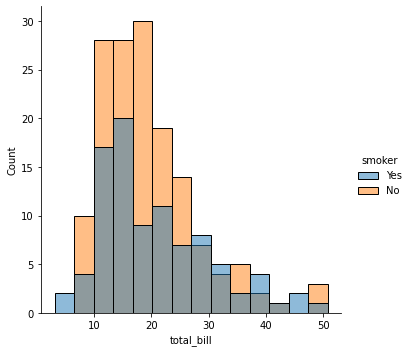

In [72]:
sns.displot(data=df, x='total_bill', hue='smoker')
plt.show()

- the histogram is turning grey when the two values (yes and no) overlap

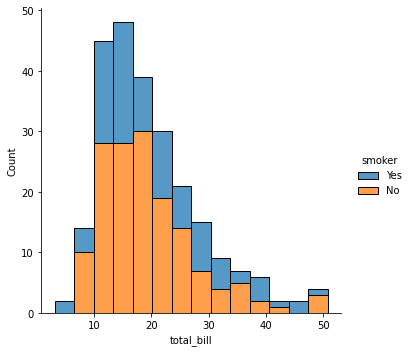

In [74]:
# histogram with hue and stacking
sns.displot(data=df, x='total_bill', hue='smoker', multiple='stack')
plt.show()

- this view, the second category is added to the top of the previous category (not overlay!)

#### Axes-level plot

- `sns.histplot`

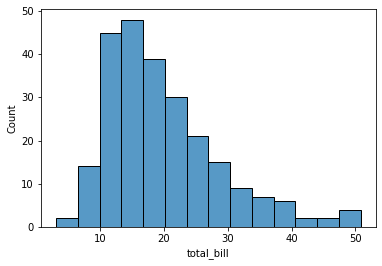

In [75]:
sns.histplot(df.total_bill)
plt.show()

## Catplot

- for comparing a continuous variable and a categorical variable

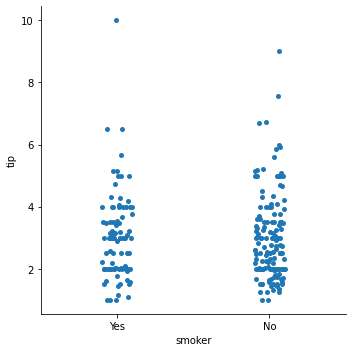

In [78]:
#defaults to a stripplot
sns.catplot(data=df, y='tip', x='smoker')
plt.show()

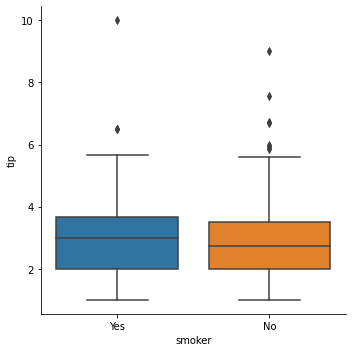

In [79]:
#boxplot
sns.catplot(data=df, y='tip', x='smoker', kind='box')
plt.show()

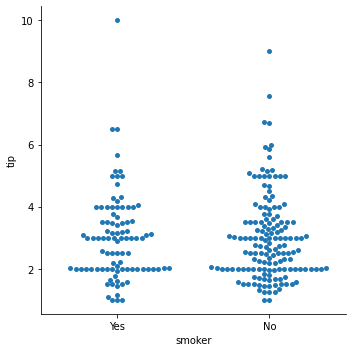

In [80]:
#swarmplot
sns.catplot(data=df, y='tip', x='smoker', kind='swarm')
plt.show()

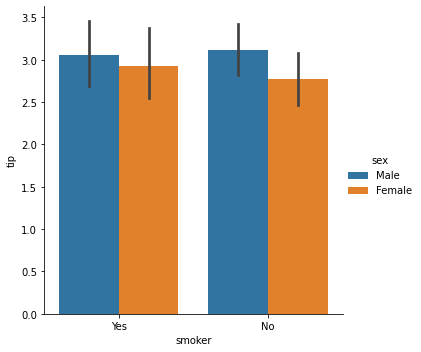

In [122]:
#barplot
sns.catplot(data=df, y='tip', x='smoker', kind='bar', hue='sex')
plt.show()

- the black lines are confidence intervals

## Dogplot

- since there is a catplot, there must be a dogplot

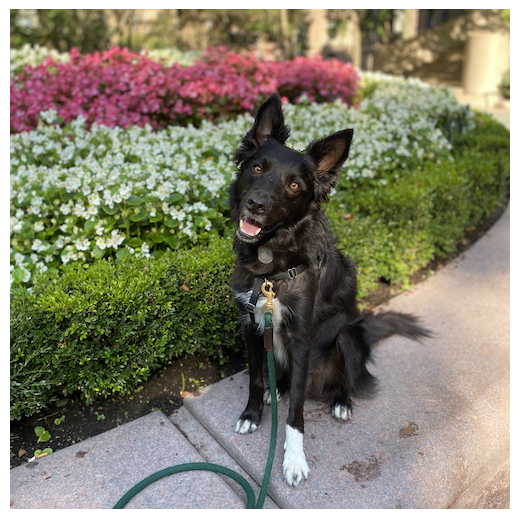

In [86]:
sns.dogplot()

## Subplots

- set up the same way as matplotlib
- must use axes-level seaborn plots

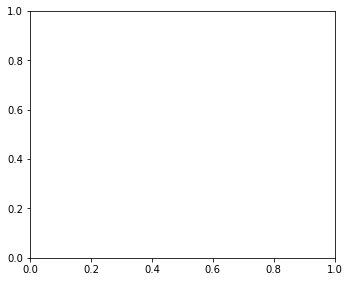

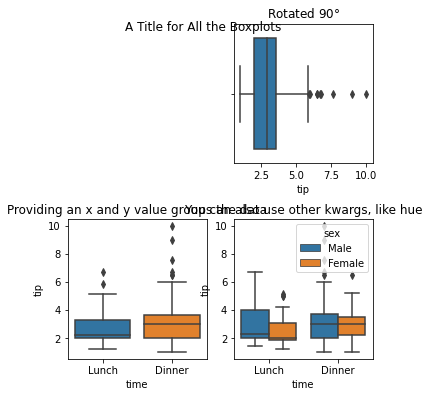

In [89]:
# specify my figure and my figsize
plt.figure(figsize=(12, 10))

plt.subplot(221)
sns.catplot(data=df, y='tip') #dont want to use a figure-level plot while using subplots
# sns.boxplot(data=df, y='tip')
plt.title('A "typical" boxplot')

plt.subplot(222)
sns.boxplot(data=df, x='tip') #use the axes-level plot instead!
plt.title('Rotated 90$\degree$')

plt.subplot(223)
sns.boxplot(data=df, y='tip', x='time')
plt.title('Providing an x and y value groups the data')

plt.subplot(224)
sns.boxplot(data=df, y='tip', x='time', hue='sex')
plt.title('You can also use other kwargs, like hue')

# giving it a super title
# (a title for all the plots together)
plt.suptitle('A Title for All the Boxplots')
plt.subplots_adjust(hspace=0.4)

## Pairplot

- grabs all numeric type columns and plots the relationship between each of them

In [91]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

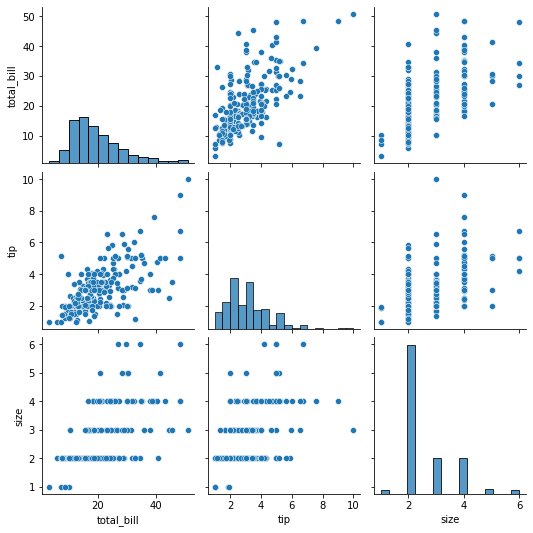

In [92]:
sns.pairplot(data=df)
plt.show()

#### use arguments

- use `hue` argument to visualize relationship based of different categories
- use `corner` to ignore duplicate plots
- use `palette` to change colors: 
    - all palette options: https://www.practicalpythonfordatascience.com/ap_seaborn_palette
    - futher reading on how to choose palettes: https://seaborn.pydata.org/tutorial/color_palettes.html

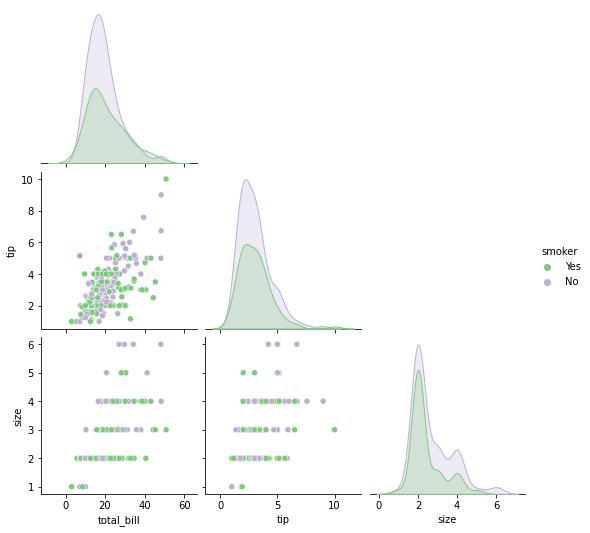

In [99]:
sns.pairplot(data=df, hue='smoker', corner=True, palette='Accent')
plt.show()

- we want a palette that has different colors for each category so we can distigush them 

## Heatmap

- shows the relationship between variables
- arguments:
    - `cmap`: for setting color palette
    - `annot`: to write the values on the map
    - `fmt`: format the values 

#### categorical variables
- comparing counts

In [104]:
#start with crosstab to get counts
df_ctab = pd.crosstab(df.smoker, df.time)
df_ctab

time,Lunch,Dinner
smoker,,
Yes,23,70
No,45,106


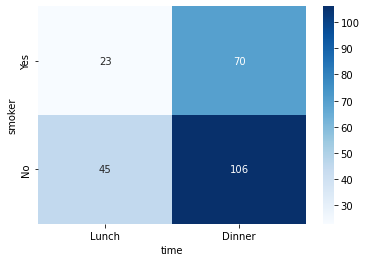

In [110]:
#apply heatmap on counts
sns.heatmap(df_ctab, annot=True, fmt='d', cmap='Blues')
plt.show()

- here we want a palette that has a color gradient so we can easily see the relationship between values

#### numeric variables
- comparing correlation

In [112]:
#get correlations using .corr()
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


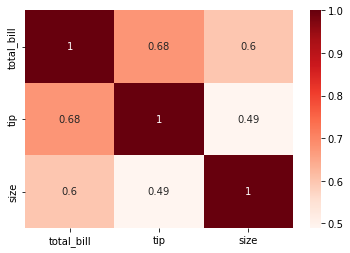

In [117]:
#apply heatmap to correlations
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.show()